In [1]:
import os
import sys

# Define the folder path
folder_path = r'D:\2_CodeProjects\GitHub\Repos\MESH-Scripts-PyLib\src'

# Check if the folder is already in sys.path, if not, add it
if folder_path not in sys.path:
    sys.path.append(folder_path)

from VectorPostProcessing.save_mesh_outputs_as_png import save_mesh_outputs_as_png

len(dims) == 2 and dims[1] == grudim


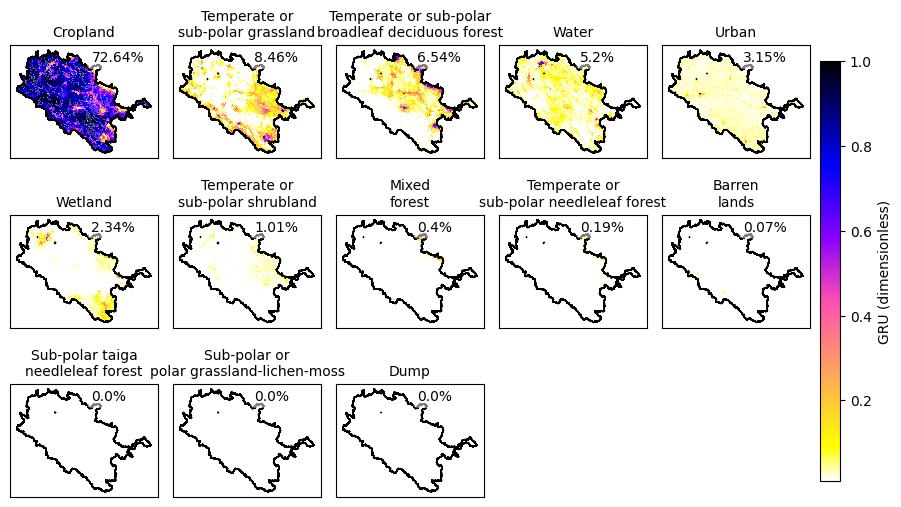

In [11]:
import os
from VectorPostProcessing.plt_var_vector_setup import plt_var_from_vector_ddb_netcdf

# Option 1: Use forward‐slashes throughout
base_dir   = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/MESH-sras-agg"
shp_dir    = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/geofabric-outputs"

# Option 2: (equivalent) use a raw‐string literal so that backslashes aren’t escapes:
# base_dir = r"D:\3a_ModelSimulations\MESH\Baseline\sras-agg-model_1\MESH-sras-agg"
# shp_dir  = r"D:\3a_ModelSimulations\MESH\Baseline\sras-agg-model_1\geofabric-outputs"

shapefile_path = os.path.join(shp_dir, "sras_subbasins_MAF_Agg.shp")
netcdf_path    = os.path.join(base_dir, "MESH_drainage_database.nc")
output_dir     = os.path.join(base_dir, "Outputs")

# make sure Outputs exists
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "GRU.png")

# define your land‐use classes
lclass = [
    'Temperate or sub-polar needleleaf forest',
    'Sub-polar taiga needleleaf forest',
    'Temperate or sub-polar broadleaf deciduous forest',
    'Mixed forest', 'Temperate or sub-polar shrubland',
    'Temperate or sub-polar grassland',
    'Sub-polar or polar grassland-lichen-moss',
    'Wetland', 'Cropland', 'Barren lands', 'Urban',
    'Water', 'Dump'
]

# sanity‐check that the files exist
for p in (shapefile_path, netcdf_path):
    if not os.path.isfile(p):
        raise FileNotFoundError(f"Can't find file: {p!r}")

plt_var_from_vector_ddb_netcdf(
    output_basin_path=shapefile_path,
    ddbnetcdf_path=netcdf_path,
    variable_name='GRU',
    save_path=output_path,
    text_location=(0.55, 0.95),
    font_size=10,
    cmap='gnuplot2_r',
    cbar_location=[0.91, 0.15, 0.02, 0.7],
    subplot_adjustments={'left': 0.1, 'right': 0.9, 'bottom': 0.1, 'top': 0.9,
                         'wspace': 0.1, 'hspace': 0.2},
    subbasin_var='subbasin',
    comid_var='COMID',
    landuse_classes=lclass,
    grudim='NGRU',
    grunames_var='LandUse'
)


len(dims) == 2 and dims[1] ==  soldim


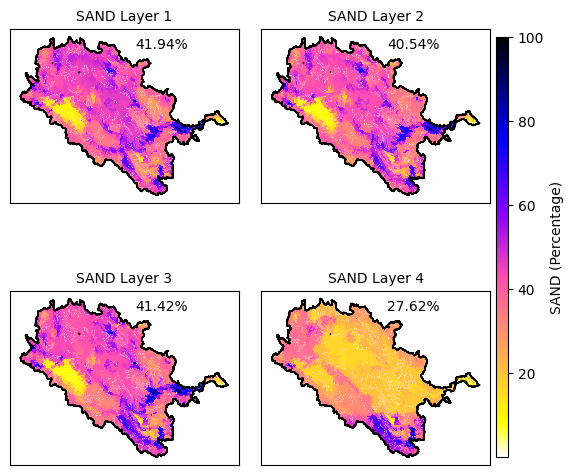

In [13]:
import os
from VectorPostProcessing.plt_var_vector_setup import plt_var_from_vector_ddb_netcdf
# Option 1: Use forward‐slashes throughout
base_dir   = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/MESH-sras-agg"
shp_dir    = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/geofabric-outputs"

# Option 2: (equivalent) use a raw‐string literal so that backslashes aren’t escapes:
# base_dir = r"D:\3a_ModelSimulations\MESH\Baseline\sras-agg-model_1\MESH-sras-agg"
# shp_dir  = r"D:\3a_ModelSimulations\MESH\Baseline\sras-agg-model_1\geofabric-outputs"

output_basin_path = os.path.join(shp_dir, 'sras_subbasins_MAF_Agg.shp')
ParametersNetcdf = os.path.join(base_dir, 'MESH_parameters.nc')
variable_name = 'SAND'  # or 'GRU' or any other variable in the drainage database netcdf file
save_path = os.path.join(base_dir, 'Outputs', f'{variable_name}.png')



plt_var_from_vector_ddb_netcdf(
    output_basin_path, 
    ParametersNetcdf, 
    variable_name, 
    save_path,
    text_location=(0.55, 0.95),
    font_size=10,
    cmap='gnuplot2_r',  # You can specify a different colormap here if needed
    cbar_location=[0.91, 0.15, 0.02, 0.7],  # Custom colorbar location if needed
    subplot_adjustments={'left': 0.1, 'right': 0.9, 'bottom': 0.1, 'top': 0.9, 'wspace': 0.1, 'hspace': 0.2},  # Optional subplot adjustments
    subbasin_var='subbasin',  # Default to 'subbasin' it is identifier from drainage database
    comid_var='COMID',  # Default to 'COMID' this is your shapefile identifier for merging
    landuse_classes=None,  #  use None or specify lclass
    grudim = 'NGRU',    #from netcdf ddb
    grunames_var = 'LandUse'  #from netcdf ddb
)

In [2]:
from VectorPostProcessing.save_mesh_outputs_as_png import save_mesh_outputs_as_png
# Option 1: Use forward‐slashes throughout
base_dir   = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/MESH-sras-agg"
shp_dir    = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/geofabric-outputs"
netcdf_path = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/sras_MESH_PostProcessing/BASINAVG4"



shape_path = os.path.join(shp_dir, 'sras_subbasins_MAF_Agg.shp')
ddbnetcdf = os.path.join(base_dir, 'MESH_drainage_database.nc')
variable_name = 'SAND'  # or 'GRU' or any other variable in the drainage database netcdf file
save_path = os.path.join(netcdf_path, 'Outputs')

save_mesh_outputs_as_png(
    shapefile_path=shape_path,
    netcdf_dir=netcdf_path,
    ddb_path=ddbnetcdf,
    varnames=['QO', 'SNO'],
    filenames=['QO_Y_GRD.nc', 'SNO_Y_GRD.nc'],
    cbar_labels=['Discharge [m³/s]', 'Snow Mass [mm]'],
    outdir=save_path,
    indices_to_save=[0, 5, 10, 20],
    mode='yearly',
    domain_name='SrAs',
    comid_field='COMID'
)



Spot-check for 'QO' at time index 0:
 COMID 71021939.0: original=0.0025404265616089106 ⟶ merged=0.0025404265616089106
 COMID 71037106.0: original=0.0015919574070721865 ⟶ merged=0.0015919574070721865
 COMID 71048254.0: original=0.004185530357062817 ⟶ merged=0.004185530357062817
──────── end spot-check ────────


Spot-check for 'QO' at time index 5:
 COMID 71021939.0: original=0.24963685870170593 ⟶ merged=0.24963685870170593
 COMID 71037106.0: original=0.11806091666221619 ⟶ merged=0.11806091666221619
 COMID 71048254.0: original=0.11645004898309708 ⟶ merged=0.11645004898309708
──────── end spot-check ────────


Spot-check for 'QO' at time index 10:
 COMID 71021939.0: original=0.22411635518074036 ⟶ merged=0.22411635518074036
 COMID 71037106.0: original=0.12489274144172668 ⟶ merged=0.12489274144172668
 COMID 71048254.0: original=0.05725710466504097 ⟶ merged=0.05725710466504097
──────── end spot-check ────────


Spot-check for 'QO' at time index 20:
 COMID 71021939.0: original=0.03155743330

In [4]:
from VectorPostProcessing.save_mesh_outputs_as_png import save_mesh_outputs_as_png

# Option 1: Use forward‐slashes throughout
base_dir   = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/MESH-sras-agg"
shp_dir    = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/geofabric-outputs"
netcdf_path = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/MESH-sras-agg"



shape_path = os.path.join(shp_dir, 'sras_subbasins_MAF_Agg.shp')
ddbnetcdf = os.path.join(base_dir, 'MESH_drainage_database.nc')
variable_name = 'SAND'  # or 'GRU' or any other variable in the drainage database netcdf file
save_path = os.path.join(netcdf_path, 'Outputs')

save_mesh_outputs_as_png(
    shapefile_path=shape_path,
    netcdf_dir=netcdf_path,
    ddb_path=ddbnetcdf,
    varnames=['RDRS_v2.1_P_TT_09944'],
    filenames=['MESH_forcing.nc'],
    cbar_labels=['Temperature [K]'],
    outdir=save_path,
    indices_to_save=[0, 5],
    mode='hourly',
    domain_name='SrAs',
    comid_field='COMID',
    cmap= 'gnuplot2_r'  # Specify a colormap if needed
)


Head of DataFrame:
         ID
0  71031862
1  71031180
2  71031860
3  71031399
4  71029493
Head of Shapefile DataFrame:
        COMID    unitarea  NextDownID      uparea  mean_xslp_     TotalRiv_s  \
0  71021939.0   76.913653  71027254.0  552.472643    0.256713  264312.531250   
1  71022301.0  143.486374  71027718.0  143.486374    0.845695  394496.968750   
2  71022434.0   59.981617  71027895.0   59.981617    0.692821  193145.687500   
3  71022862.0   90.478867  71027718.0  612.452783    1.028295  248450.640625   
4  71023030.0  114.109551  71022862.0  521.973916    1.002582  320520.343750   

   mean_xsl_1     TotalRiv_1     TotalRiv_2  mean_xsl_2  \
0    0.256713  264312.531250  264312.531250    0.256713   
1    0.845695  394496.968750  394496.968750    0.845695   
2    0.692821  193145.687500  193145.687500    0.692821   
3    1.028295  248450.640625  248450.640625    1.028295   
4    1.002582  320520.343750  320520.343750    1.002582   

                                            

In [21]:
import os
from VectorPostProcessing.animate_var_vector_setup import animate_mesh_outputs_to_gif
# Option 1: Use forward‐slashes throughout
base_dir   = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/MESH-sras-agg"
shp_dir    = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/geofabric-outputs"
netcdf_path = "D:/3a_ModelSimulations/MESH/Baseline/sras-agg-model_1/sras_MESH_PostProcessing/BASINAVG4"

shape_path = os.path.join(shp_dir, 'sras_subbasins_MAF_Agg.shp')
ddbnetcdf = os.path.join(base_dir, 'MESH_drainage_database.nc')
save_path = os.path.join(netcdf_path, 'Outputs')


animate_mesh_outputs_to_gif(
    shapefile_path=shape_path,
    netcdf_dir=netcdf_path,
    ddb_path=ddbnetcdf,
    varnames=['QO', 'SNO', 'PREC'],
    filenames=['QO_Y_GRD.nc', 'SNO_Y_GRD.nc', 'PREC_Y_GRD.nc'],
    cbar_labels=['Discharge [m³/s]', 'Snow Mass [mm]', 'Precipitation [mm]'],
    outdir=save_path,
    mode='monthly',
    domain_name='SrAs',
    comid_field='COMID',
    cmap= 'gnuplot2_r'  # Specify a colormap if needed
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample setup (replace this with your actual data)
# For example purposes only
np.random.seed(0)
nse_data = {
    'Model A': np.random.uniform(0.7, 0.82, 54),
    'Model B': np.random.uniform(0.72, 0.81, 54),
    'Model C': np.random.uniform(0.74, 0.80, 54),
}

kge_data = {
    'Model A': np.random.uniform(0.3, 0.8, 54),
    'Model B': np.random.uniform(0.2, 0.85, 54),
    'Model C': np.random.uniform(0.1, 0.9, 54),
}

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# NSE Plot (Panel a)
for label, values in nse_data.items():
    sorted_vals = np.sort(values)
    cdf = np.linspace(0, 1, len(sorted_vals))
    axes[0].plot(sorted_vals, cdf, label=label)

axes[0].set_title("(a)", loc='left', fontsize=14, fontweight='bold')
axes[0].set_xlabel("Objective Function")
axes[0].set_ylabel("CDF")
axes[0].legend()
axes[0].grid(True)

# KGE Plot (Panel b)
for label, values in kge_data.items():
    sorted_vals = np.sort(values)
    cdf = np.linspace(0, 1, len(sorted_vals))
    axes[1].plot(sorted_vals, cdf, label=label)

axes[1].set_title("(b)", loc='left', fontsize=14, fontweight='bold')
axes[1].set_xlabel("Objective Function")
axes[1].set_ylabel("CDF")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
